# Example 7: AH-polytopes of Zonotopes

In [1]:
import numpy as np
import pypolycontain as pp
np.random.seed(0)

In [2]:
D={}
for n in [2,3,5,7,10]:
    print("\n",n)
    X1=pp.zonotope( x=np.zeros((n,1)), G=np.random.normal(size=(n,2*n))  )
    # X2=pp.zonotope( x=np.ones((n,1))*n, G=np.random.normal(size=(n,n))  )
    # X1.color='red'
    # X2.color='purple'
    # X=pp.convex_hull(X1,X2)
    # X.color='yellow'
    X=pp.to_AH_polytope(X1)

    Y0=pp.ray_shooting_hyperplanes_new(X,N=n*10,tol=10)
    print(n,'\t',Y0.H.shape[0])
    B=pp.bounding_box(X)
    # pp.visualize([B,Y0,X],alpha=0.5)
    #print(pp.Hausdorff_distance(X,Y0,directed=True,k=0))
    D[n,'box']=B.D
    Y=pp.boxing_order_reduction(X1,1)
    D[n,'hyperplanes']=Y0.H.shape[0]
    Y1,D[n,'inner']=pp.inner_optimization(X,Y0,k=-1)
    Y2,D[n,'outer']=pp.outer_optimization(X,Y0)
    D[n,'ray']=pp.Hausdorff_distance(X,Y0,directed=True,k=-1)/B.D
    D[n,'opt']=pp.Hausdorff_distance(X,Y2,directed=True,k=-1)/B.D
    D[n,'order']=pp.Hausdorff_distance(X,Y,directed=True,k=-1)/B.D
    D[n,'hausinner']=pp.Hausdorff_distance(Y1,X,directed=True,k=-1)/B.D


 2
2 	 6
Using Positive Orthant
success
determinent= 0.37313017170424173
Using Positive Orthant
success
determinent= 1.000073047097753

 3
3 	 9
Using Positive Orthant
success
determinent= 0.06231129189062819
Using Positive Orthant
success
determinent= 1.6804769064490708

 5
5 	 40


[2021-01-04 14:29:50.119] [console] [info] SCS returns code 2, with message "SCS solved inaccurate".



Using Positive Orthant
success
determinent= 0.011765305802448648
Using Positive Orthant
success
determinent= 1.1244110567547485

 7
7 	 117
Using Positive Orthant


[2021-01-04 14:30:06.671] [console] [info] SCS returns code 2, with message "SCS solved inaccurate".



success
determinent= 0.0007033210021191195
Using Positive Orthant
success
determinent= 1.2186189346607201

 10
10 	 199
Using Positive Orthant


[2021-01-04 14:30:56.361] [console] [info] SCS returns code 2, with message "SCS solved inaccurate".



success
determinent= 6.901664733346838e-07
Using Positive Orthant
success
determinent= 1.9817691745712132


In [3]:
for n in [2,3,5,7,10]:
    print(r' %d &  %d & %0.03f & %0.03f & %0.003f & %0.03f & %0.03f  & %0.03f \\ \hline'\
         %(n, D[n,'hyperplanes'], D[n,'inner'], D[n,'hausinner'],\
           D[n,'outer'], D[n,'ray'],D[n,'opt'],D[n,'order'] ))

 2 &  6 & 0.373 & 0.143 & 1.000 & 0.244 & 0.245  & 0.254 \\ \hline
 3 &  9 & 0.062 & 0.162 & 0.595 & 0.390 & 0.592  & 0.269 \\ \hline
 5 &  40 & 0.012 & 0.246 & 0.889 & 0.309 & 0.311  & 0.359 \\ \hline
 7 &  117 & 0.001 & 0.271 & 0.821 & 0.394 & 0.389  & 0.391 \\ \hline
 10 &  199 & 0.000 & 0.292 & 0.505 & 0.475 & 0.514  & 0.372 \\ \hline


In [4]:
# Y1=pp.inner_optimization(X,Y0,k=-1)
# Y2=pp.outer_optimization(X,Y0)

projection on  0  and  1 dimensions
projection on  0  and  1 dimensions
projection on  0  and  1 dimensions
projection on  0  and  1 dimensions


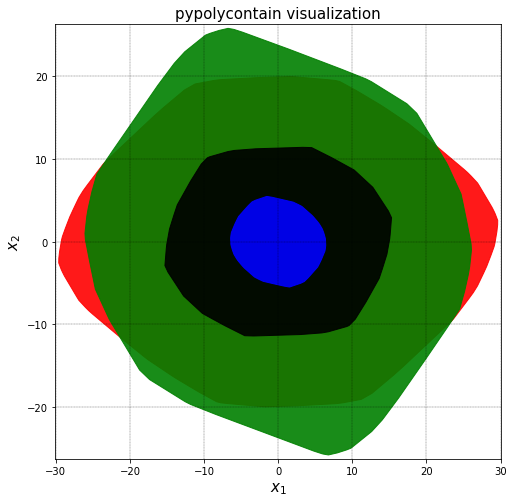

In [5]:
Y2.color,Y1.color,Y0.color='red','blue','green'
X.color,Y.color='black','yellow'
pp.visualize([Y2,Y0,X,Y1],alpha=0.9)

In [6]:
# print('Ray Shooting',pp.Hausdorff_distance(X,Y,directed=True,k=-1))
# print('Optimization',pp.Hausdorff_distance(X,Y2,directed=True,k=-1))
# print('Order Reduction',pp.Hausdorff_distance(X,Y,directed=True,k=-1))